## Cargamos librerias ##

In [ ]:
import pandas as pd 
pd.options.display.max_columns = None
pd.options.display.max_rows = 1000

import numpy as np 

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from scipy.stats import linregress

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
from sklearn import neighbors

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from sklearn.decomposition import PCA


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import re
from datetime import datetime
from operator import index

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Montamos Drive e Importamos bases ##

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hoja1 = pd.read_excel('/content/drive/MyDrive/Databases/Proyecto Final/online_retail_II.xlsx', sheet_name='Year 2009-2010')
hoja2 = pd.read_excel('/content/drive/MyDrive/Databases/Proyecto Final/online_retail_II.xlsx', sheet_name='Year 2010-2011')

## Revisamos que tiene de información ##

In [ ]:
hoja1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
hoja1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
hoja2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
hoja2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
data1 = pd.concat([hoja1, hoja2])

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [ ]:
duplicados = data1[data1.duplicated()]
duplicados

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [ ]:
data1 = data1.drop_duplicates()
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033036 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1033036 non-null  object        
 1   StockCode    1033036 non-null  object        
 2   Description  1028761 non-null  object        
 3   Quantity     1033036 non-null  int64         
 4   InvoiceDate  1033036 non-null  datetime64[ns]
 5   Price        1033036 non-null  float64       
 6   Customer ID  797885 non-null   float64       
 7   Country      1033036 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 70.9+ MB


In [ ]:
data1.isnull().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64

In [ ]:
dataNulls = data1[data1.Description.isnull()]
dataNulls

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [ ]:
dataNulls.Price.unique()

array([0.])

In [ ]:
dataNulls['Customer ID'].unique()

array([nan])

In [ ]:
dataNulls['Quantity'].unique()

array([  -50,   -44,   230,    17,  -770,  -240,    12,   954,  -200,
          48,   467, -1012,   -25,   -89,   184,  -169,    80,  -106,
         -23,   -42,  -725,   222,   270,   -20,   -30,     6,   -60,
        3000,  -126,  -120,  -100,    50,   -67,  -360,    90,   180,
          40,    30,    -8,    65,   -58,     2,   -45,   -54,   -96,
         -46,  -136, -1395,  -322,   -21,   -24,   -18,   100,   -81,
         -99,   -36,   -29,  -150,   -10,   -17,   -47,   -39,  -396,
        -152,    72,   -70,   250,   -91,  2300,   520,   920,  1800,
          35,   480,   152,    76,    79,    74,   187,   453,   348,
         445,    45,    39,    36,   784,    37,    28,  2000,    24,
          46,    21,    20,    18,    15,   174,    14,   163,    52,
          11,    66,    10,     9,     8,     7,     5,    -5,     4,
          86,     3,    -2,  -113,     1,  -207,    43,   316,  -632,
         -38,   -11,    23,  -292,   -15,   -84,    89,   200,  -104,
         -43,   120,

In [ ]:
dataNulls2 = data1[data1['Customer ID'].isnull()]
dataNulls2

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [ ]:
dataNulls2.Country.unique()

array(['United Kingdom', 'Nigeria', 'EIRE', 'Bahrain',
       'United Arab Emirates', 'Bermuda', 'Sweden', 'France', 'Hong Kong',
       'Lebanon', 'RSA', 'Unspecified', 'Portugal', 'Israel',
       'Switzerland'], dtype=object)

## Transformación de los datos ##

In [ ]:
def eliminar_descripcionNulos(data1):
  data2 = data1.copy()
  data2 = data2.dropna(subset=['Description'])
  return data2

In [ ]:
def year_month_week(data2):
  data3 = data2.copy()
  data3["Year"] = data3.InvoiceDate.dt.year
  data3["Quarter"] = data3.InvoiceDate.dt.quarter
  data3["Month"] = data3.InvoiceDate.dt.month
  data3["Week"] = data3.InvoiceDate.dt.week
  data3["Weekday"] = data3.InvoiceDate.dt.weekday
  data3["Day"] = data3.InvoiceDate.dt.day
  data3["Dayofyear"] = data3.InvoiceDate.dt.dayofyear
  return  data3

In [ ]:
def split_date_time(data3):
  data4 = data3.copy()
  data4['Date'] = data4.InvoiceDate.apply(datetime.strftime, args =('%Y-%m-%d',))
  data4['Date2'] = data4.InvoiceDate.apply(datetime.strftime, args =('%Y-%m',))
  data4['Hour'] = data4.InvoiceDate.apply(datetime.strftime, args =('%H',)).astype(int)
  data4 = data4.drop(columns='InvoiceDate')
  return data4

In [ ]:
def eliminar_CustomerID(data4):
  data5 = data4.copy()
  data5 = data5.drop(columns='Customer ID')
  return data5

In [ ]:
def compra_return(data5):
  data6 = data5.copy()
  pattern = 'C'
  data6['Compra-Cancelado' ] = data6.Invoice.apply(cancelados).astype(int)
  return data6

In [ ]:
def cancelados(list1):
  list1= str(list1)
  for i in list1:
    if list1.startswith('C'):
      list2 = 0
    else:
      list2 = 1
  return list2

In [ ]:
def precio_Ajustado(data6):
  data7 = data6.copy()
  data7['PrecioAj'] = data7.Price*data7['Compra-Cancelado']
  return data7

In [ ]:
def convertir_qtty_positivo(data7):
  data8 = data7.copy()
  data8['QuantityAJ'] = data8.Quantity.apply(positivos).astype(int) 
  return data8

In [ ]:
def positivos(list2):
  if list2 <1:
    return (list2*-1)
  else:
    return (list2)

In [ ]:
def precio_total(data8):
  data9 = data8.copy()
  data9['Total_Price'] = data9.PrecioAj * data9.QuantityAJ
  return data9

In [ ]:
def eliminar_precios_con_ceros(data9):
  data10 = data9.copy()
  data10 = data10[(data10.Price != 0)]
  return data10

In [ ]:
def definition_Rango_Qtty(data10):
  data11 = data10.copy()
  q1 = np.percentile(data11.QuantityAJ, 25)
  q3 = np.percentile(data11.QuantityAJ, 75)
  iqr = q3 -q1
  upper_fence = q3 + 1.5*iqr
  lower_fence = q1 - 1.5*iqr
  data11 = data11[(data11.QuantityAJ < upper_fence)& (data11.QuantityAJ > lower_fence)]
  return data11

In [ ]:
def modificacion_descripcion(data11):
  data12 = data11.copy()
  data12['Descripcion_Mod'] = data12.Description.apply(minusculas)
  return data12

In [ ]:
def minusculas (list3):
  for i in list3:
    list4 = list3.lower()
    return list4

In [ ]:
def tab_descripcion(data12):
  data13 = data12.copy()
  data13b = data12.copy()
  columns = ['StockCode', 'Descripcion_Mod','Description', 'QuantityAJ']
  data13 = data12[columns]
  #Creamos la tabla que contiene las descripciones y sus valores en Quantity
  tabla_descripciones = data13.groupby(['StockCode','Descripcion_Mod'], as_index=False ).agg({'QuantityAJ':'sum'})
  #De esa tabla creada creamos otra pero con solo los maximos de las tablas para no repetir valores
  tabla_descripciones2 = tabla_descripciones.groupby(['StockCode'], as_index=False).agg({'QuantityAJ':'max'})
  # tabla_descripciones2
  #Hacemos un merge para quedarnos con los valores que se encuentren en la tabla_descripciones2 con sus descripciones ajustadas
  tabla_descripciones3 = pd.merge(tabla_descripciones2, tabla_descripciones, how='left',  on=['StockCode','QuantityAJ'])
  #Eliminamos duplicados ya que tenemos 2 casos que compartian cantidad y stockCode
  tabla_descripciones3.drop_duplicates(['StockCode','QuantityAJ'],inplace=True)
  #Dropeamos la columna de QuantityAJ ya que no nos sirve más
  tabla_descripciones3.drop('QuantityAJ', axis= 1,inplace=True)
  # tabla_descripciones3
  data13b = pd.merge(data13b, tabla_descripciones3, how='left',  on=['StockCode'])
  return data13b

In [ ]:
def dropeo_columnas(data13):
  data14 = data13.copy()
  columns = ['Invoice', 'StockCode','Country','Date', 'Date2','Year', 'Quarter', 'Month', 'Week', 'Weekday', 'Day', 'Dayofyear', 'Hour', 'Compra-Cancelado', 'PrecioAj', 'QuantityAJ','Total_Price', 'Descripcion_Mod_y']
  data14 = data14[columns]
  return data14

In [ ]:
def arreglo_orden_nombres(data14):
  data15 = data14.copy()
  columns = ['Invoice', 'StockCode','Descripcion_Mod_y','Country','Date','Date2','Year', 'Quarter', 'Month', 'Week', 'Weekday', 'Day', 'Dayofyear', 'Hour', 'Compra-Cancelado', 'PrecioAj',
             'QuantityAJ','Total_Price', ]
  data15 = data15[columns]
  return data15

In [ ]:
  def arreglo_nombres(data15):
    data16 = data15.copy()
    data16 = data16.rename(columns ={'Invoice':'Factura','StockCode':'CodigoProd','Descripcion_Mod_y':'Descripcion','Country':'Pais','Date':'Fecha','Date2':'Date','Year':'Año','Quarter':'Q',
                                     'Month':'Mes','Week':'Semana','Weekday':'DiaSemana','Day':'Dia','Dayofyear':'DiaAño','Hour':'Hora','Compra-Cancelado':'Compra/Cancelacion',
                                     'PrecioAj':'Precio','QuantityAJ':'Cantidad','Total_Price':'Total'})
    return data16

In [ ]:
def dropeo_renglones(data16):
  data17 = data16.copy()
  data17 = data17[data17.Precio>-1]
  return data17

In [ ]:
def definition_Rango_Precio(data17):
  data18 = data17.copy()
  indexNames = data18[(data18['CodigoProd'] =='DOT')|(data18['CodigoProd'] =='POST')|(data18['CodigoProd'] =='ADJUST')|(data18['CodigoProd'] =='M')|
                      (data18['CodigoProd'] =='ADJUST2')|(data18['CodigoProd'] =='AMAZONFEE')|(data18['CodigoProd'] =='B')|(data18['CodigoProd'] =='TEST001')|
                      (data18['CodigoProd'] =='TEST002')|(data18['CodigoProd'] =='22355')|(data18['CodigoProd'] =='22823')].index



  data18.drop(indexNames, inplace=True)
  return data18

In [ ]:
def quitar_cancelaciones(data18):
  data19 = data18.copy()
  data19 = data19[data19['Compra/Cancelacion']==1]
  data19 = data19[data19['Año']!=2009]
  return data19

In [ ]:
def solamente_UK(data19):
  data20 = data19.copy()
  data20 = data20[data20['Pais']=='United Kingdom']
  return data20

In [ ]:
data2 = eliminar_descripcionNulos(data1)
data3 = year_month_week(data2)
data4 = split_date_time(data3)
data5 = eliminar_CustomerID(data4) 
data6 = compra_return(data5)
data7 = precio_Ajustado(data6)
data8 = convertir_qtty_positivo(data7)
data9 = precio_total(data8)
data10 = eliminar_precios_con_ceros(data9)
data11 = definition_Rango_Qtty(data10)
data12 = modificacion_descripcion(data11)
data13 = tab_descripcion(data12)
data14 = dropeo_columnas(data13)
data15 = arreglo_orden_nombres(data14)
data16 = arreglo_nombres(data15)
data17 = dropeo_renglones(data16)
data18 = definition_Rango_Precio(data17)
data19 = quitar_cancelaciones(data18)
data20 = solamente_UK(data19)
data20.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,Factura,CodigoProd,Descripcion,Pais,Fecha,Date,Año,Q,Mes,Semana,DiaSemana,Dia,DiaAño,Hora,Compra/Cancelacion,Precio,Cantidad,Total
42256,493413,21724,panda and bunnies sticker sheet,United Kingdom,2010-01-04,2010-01,2010,1,1,1,0,4,4,9,1,0.85,1,0.85
42257,493413,84578,elephant toy with blue t-shirt,United Kingdom,2010-01-04,2010-01,2010,1,1,1,0,4,4,9,1,3.75,1,3.75
42258,493413,21723,alphabet hearts sticker sheet,United Kingdom,2010-01-04,2010-01,2010,1,1,1,0,4,4,9,1,0.85,1,0.85
42259,493414,21533,retro spot large milk jug,United Kingdom,2010-01-04,2010-01,2010,1,1,1,0,4,4,10,1,4.25,12,51.00
42260,493414,37508,new england ceramic cake server,United Kingdom,2010-01-04,2010-01,2010,1,1,1,0,4,4,10,1,2.55,2,5.10


In [ ]:
data20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840980 entries, 42256 to 972135
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Factura             840980 non-null  object 
 1   CodigoProd          840980 non-null  object 
 2   Descripcion         840980 non-null  object 
 3   Pais                840980 non-null  object 
 4   Fecha               840980 non-null  object 
 5   Date                840980 non-null  object 
 6   Año                 840980 non-null  int64  
 7   Q                   840980 non-null  int64  
 8   Mes                 840980 non-null  int64  
 9   Semana              840980 non-null  int64  
 10  DiaSemana           840980 non-null  int64  
 11  Dia                 840980 non-null  int64  
 12  DiaAño              840980 non-null  int64  
 13  Hora                840980 non-null  int64  
 14  Compra/Cancelacion  840980 non-null  int64  
 15  Precio              840980 non

In [ ]:
data19['Compra/Cancelacion'].unique()

array([1])

## Info para tablas ##

In [ ]:
sumCantidad = data19.Cantidad.sum()
sumTotal = data19.Total.sum()
print('Cantidad total vendida', sumCantidad)
print('Ventas totales en $', sumTotal)

Cantidad total vendida 5379110
Ventas totales en $ 11884555.287999997


In [ ]:
ventas_2010 = data19[data19.Año==2010]
ventas_2011 = data19[data19.Año==2011]
sumCantidad_2010 = ventas_2010.Cantidad.sum()
sumCantidad_2011 = ventas_2011.Cantidad.sum()
sumTotal_2010 = ventas_2010.Total.sum()
sumTotal_2011 = ventas_2011.Total.sum()
print('Cantidad total vendida 2010', sumCantidad_2010)
print('Ventas totales en 2010 en $', sumTotal_2010)
print('Cantidad total vendida 2011', sumCantidad_2011)
print('Ventas totales en 2011 en $', sumTotal_2011)

Cantidad total vendida 2010 2650805
Ventas totales en 2010 en $ 6015659.214
Cantidad total vendida 2011 2728305
Ventas totales en 2011 en $ 5868896.074


In [ ]:
ventas_pais_volumen = data19.groupby(['Pais'], as_index=False).agg({'Cantidad':'sum'})
ventas_pais_volumen['porcentaje'] =(ventas_pais_volumen['Cantidad'] / ventas_pais_volumen['Cantidad'].sum()) * 100
ventas_pais_volumen = ventas_pais_volumen.sort_values(by='Cantidad', ascending=False)
ventas_pais_volumen['Acumulativo_Porcentaje'] =(ventas_pais_volumen['porcentaje'].cumsum())
ventas_pais_volumen 

,Pais,Cantidad,porcentaje,Acumulativo_Porcentaje
40,United Kingdom,4693730,87.258487,87.258487
15,Germany,152070,2.827048,90.085535
11,EIRE,143493,2.667597,92.753132
14,France,121888,2.265951,95.019083
36,Switzerland,30044,0.558531,95.577614
34,Spain,27667,0.514342,96.091956
3,Belgium,27257,0.506720,96.598675
26,Netherlands,21717,0.403728,97.002404
30,Portugal,19429,0.361194,97.363597
7,Channel Islands,13479,0.250580,97.614178


In [ ]:
pd.options.display.float_format = '{:20f}'.format
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
ventas_pais_total = data19.groupby(['Pais'], as_index=False).agg({'Total':'sum'})
ventas_pais_total['porcentaje'] =(ventas_pais_total['Total'] / ventas_pais_total['Total'].sum()) * 100
ventas_pais_total = ventas_pais_total.sort_values(by='Total', ascending=False)
ventas_pais_total['Acumulativo_Porcentaje'] =(ventas_pais_total['porcentaje'].cumsum())
ventas_pais_total

,Pais,Total,porcentaje,Acumulativo_Porcentaje
40,United Kingdom,10460992.9870,88.0217,88.0217
11,EIRE,336653.0400,2.8327,90.8544
15,Germany,290607.9210,2.4453,93.2997
14,France,223898.0400,1.8839,95.1836
36,Switzerland,61000.3900,0.5133,95.6969
26,Netherlands,59448.7600,0.5002,96.1971
34,Spain,52721.2400,0.4436,96.6407
3,Belgium,51311.2300,0.4317,97.0725
30,Portugal,36086.6700,0.3036,97.3761
7,Channel Islands,32215.8200,0.2711,97.6472


In [ ]:
ventas_total_producto = data19.groupby(['Descripcion'], as_index=False).agg({'Total':'sum'})
ventas_total_producto['porcentaje'] =(ventas_total_producto['Total'] / ventas_total_producto['Total'].sum())*100
ventas_total_producto = ventas_total_producto.sort_values(by='Total', ascending=False)
ventas_total_producto['Acumulativo_Porcentaje'] =(ventas_total_producto['porcentaje'].cumsum())
ventas_total_producto = ventas_total_producto[ventas_total_producto['Acumulativo_Porcentaje']<=80]
ventas_total_producto

,Descripcion,Total,porcentaje,Acumulativo_Porcentaje
3221,regency cakestand 3 tier,212483.4300,1.7879,1.7879
4361,white hanging heart t-light holder,85898.9300,0.7228,2.5107
2701,party bunting,74366.5300,0.6257,3.1364
2067,jumbo bag red retrospot,57047.9400,0.4800,3.6164
3165,red retrospot cake stand,49241.5600,0.4143,4.0308
...,...,...,...,...
2164,large red retrospot windmill,2639.8800,0.0222,79.9093
149,airline bag vintage jet set white,2632.1800,0.0221,79.9314
4097,traditional pick up sticks game,2632.0700,0.0221,79.9536
2424,monsters stencil craft,2629.5400,0.0221,79.9757


In [ ]:
ventas_cantidad_producto = data20.groupby(['Descripcion'], as_index=False).agg({'Cantidad':'sum'})
ventas_cantidad_producto['porcentaje'] =(ventas_cantidad_producto['Cantidad'] / ventas_cantidad_producto['Cantidad'].sum())*100
ventas_cantidad_producto = ventas_cantidad_producto.sort_values(by='Cantidad', ascending=False)
ventas_cantidad_producto['Acumulativo_Porcentaje'] =(ventas_cantidad_producto['porcentaje'].cumsum())
ventas_cantidad_producto = ventas_cantidad_producto[ventas_cantidad_producto['Acumulativo_Porcentaje']<=80]
ventas_cantidad_producto

,Descripcion,Cantidad,porcentaje,Acumulativo_Porcentaje
2623,pack of 72 retrospot cake cases,28894,0.6156,0.6156
4354,white hanging heart t-light holder,26512,0.5648,1.1804
246,assorted colour bird ornament,25501,0.5433,1.7237
2067,jumbo bag red retrospot,23559,0.5019,2.2256
118,60 teatime fairy cake cases,20554,0.4379,2.6636
...,...,...,...,...
2703,party cones candy tree decoration,1060,0.0226,79.8890
1278,eight piece dinosaur set,1060,0.0226,79.9116
2611,pack of 6 handbag gift boxes,1060,0.0226,79.9342
4025,t-light holder sweetheart hanging,1058,0.0225,79.9567


## Graficos de UK ##

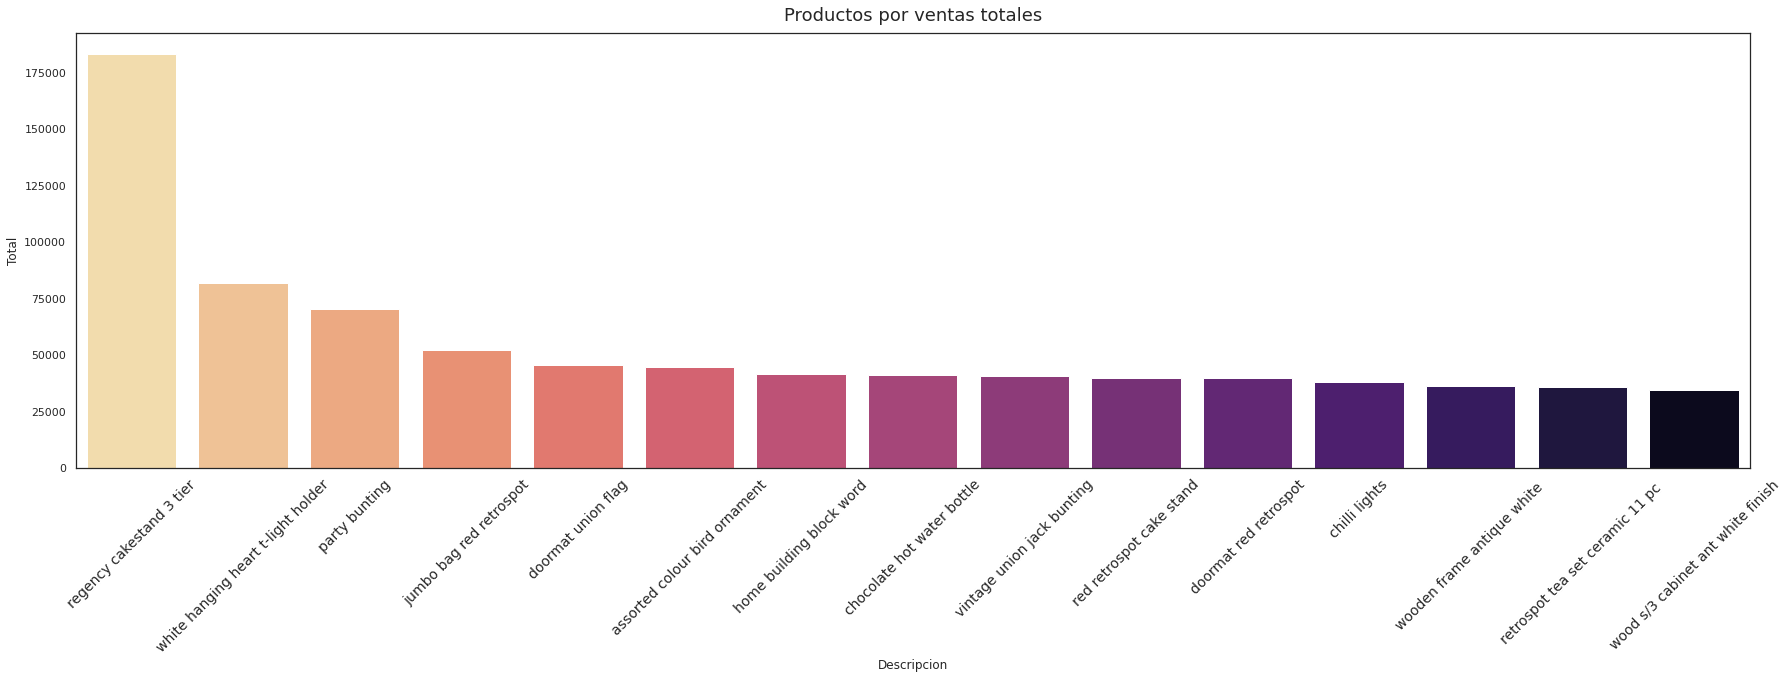

In [ ]:
ventas_total_producto_UK = data20.groupby(['Descripcion'], as_index=False).agg({'Total':'sum'})
ventas_total_producto_UK['porcentaje'] =(ventas_total_producto_UK['Total'] / ventas_total_producto_UK['Total'].sum())*100
ventas_total_producto_UK = ventas_total_producto_UK.sort_values(by='Total', ascending=False)
ventas_total_producto_UK['Acumulativo_Porcentaje'] =(ventas_total_producto_UK['porcentaje'].cumsum())
ventas_total_producto_UK = ventas_total_producto_UK[ventas_total_producto_UK['Acumulativo_Porcentaje']<=8]

datagrafico_UK = ventas_total_producto_UK.copy()
grafico_UK = datagrafico_UK.groupby('Descripcion').agg({'Total':'sum'}).sort_values('Total',ascending = False).reset_index()
sns.set(rc={'figure.figsize':(30,8)})
sns.set_style('white')
ax = sns.barplot(x='Descripcion', y= 'Total', data=grafico_UK, palette= "magma_r")
plt.xticks(rotation=45, fontsize=14)
plt.title('Productos por ventas totales', fontdict={'fontsize':18}, pad=12);
plt.savefig('Producto_por_ventas_totales.png', dpi=300, bbox_inches='tight');

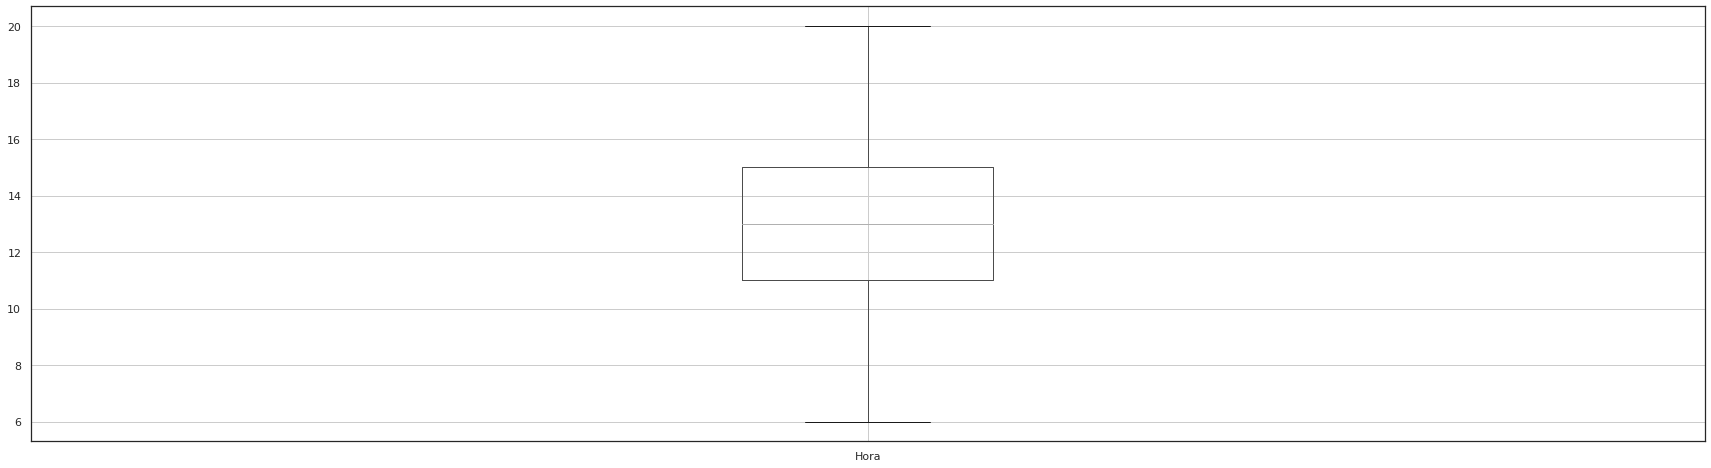

In [ ]:
data20.boxplot(column = 'Hora')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


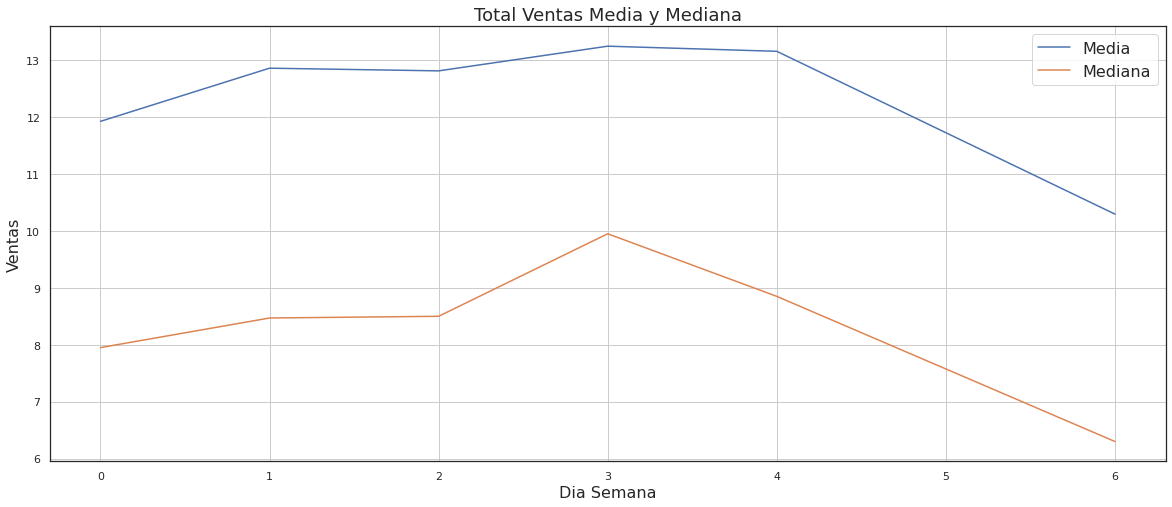

In [ ]:
datagrafico_UK2 = data20.copy()
ventas_dia_semana_media = datagrafico_UK2['Total'].groupby(datagrafico_UK2['DiaSemana']).mean()
ventas_dia_semana_mediana = datagrafico_UK2['Total'].groupby(datagrafico_UK2['DiaSemana']).median()

plt.figure(figsize = (20,8))
sns.lineplot(ventas_dia_semana_media.index, ventas_dia_semana_media.values)
sns.lineplot(ventas_dia_semana_mediana.index, ventas_dia_semana_mediana.values)
plt.grid()
plt.legend(['Media','Mediana'], loc = 'best', fontsize= 16)
plt.title('Total Ventas Media y Mediana', fontsize = 18)
plt.ylabel('Ventas', fontsize= 16)
plt.xlabel('Dia Semana', fontsize= 16)
plt.show();

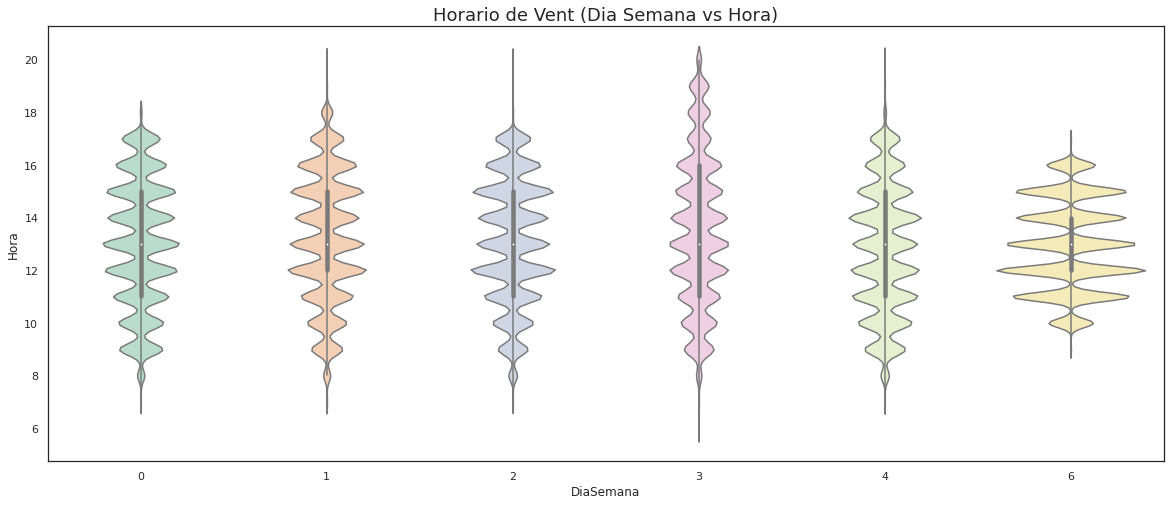

In [ ]:
data_boxplot_UK = pd.concat([data20['Hora'], data20['DiaSemana']], axis=1)
f, ax = plt.subplots(figsize=(20,8))
fig = sns.violinplot(x='DiaSemana', y= 'Hora', data = data_boxplot_UK, palette= "Pastel2")
plt.title('Horario de Vent (Dia Semana vs Hora)', fontsize = 18)
plt.savefig('Venta_porHora_dia.png', dpi=300, bbox_inches='tight');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


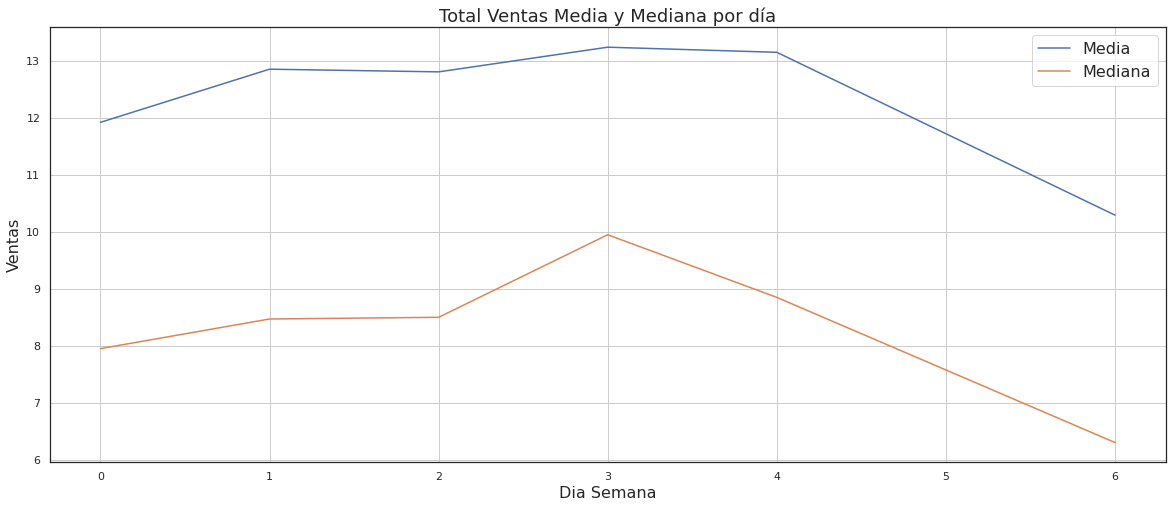

In [ ]:
datagrafico_UK_3 = data20.copy()
ventas_dia_semana_media = datagrafico_UK_3['Total'].groupby(datagrafico_UK_3['DiaSemana']).mean()
ventas_dia_semana_mediana = datagrafico_UK_3['Total'].groupby(datagrafico_UK_3['DiaSemana']).median()
plt.figure(figsize = (20,8))
sns.lineplot(ventas_dia_semana_media.index, ventas_dia_semana_media.values, palette= 'Pastel1')
sns.lineplot(ventas_dia_semana_mediana.index, ventas_dia_semana_mediana.values, palette= 'Pastel2')
plt.grid()
plt.legend(['Media', 'Mediana'], loc = 'best', fontsize= 16)
plt.title('Total Ventas Media y Mediana por día', fontsize = 18)
plt.ylabel('Ventas', fontsize= 16)
plt.xlabel('Dia Semana', fontsize= 16)
plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


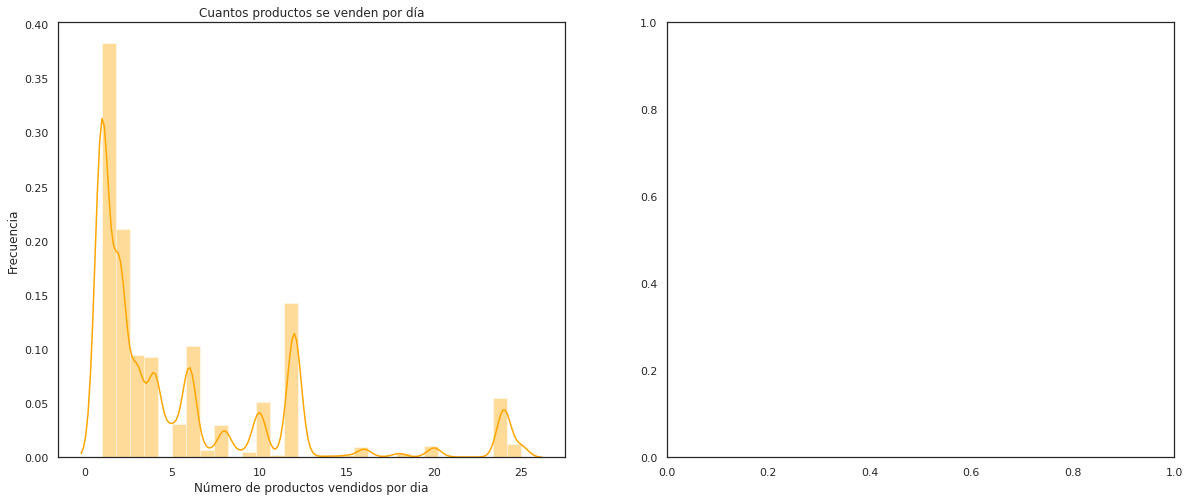

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
sns.distplot(data20.Cantidad.values, kde=True, ax=ax[0], color="Orange", bins=30);
ax[0].set_xlabel("Número de productos vendidos por dia");
ax[0].set_ylabel("Frecuencia");
ax[0].set_title("Cuantos productos se venden por día");
plt.savefig('Producto_Se_venden_por_dia.png', dpi=300, bbox_inches='tight');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


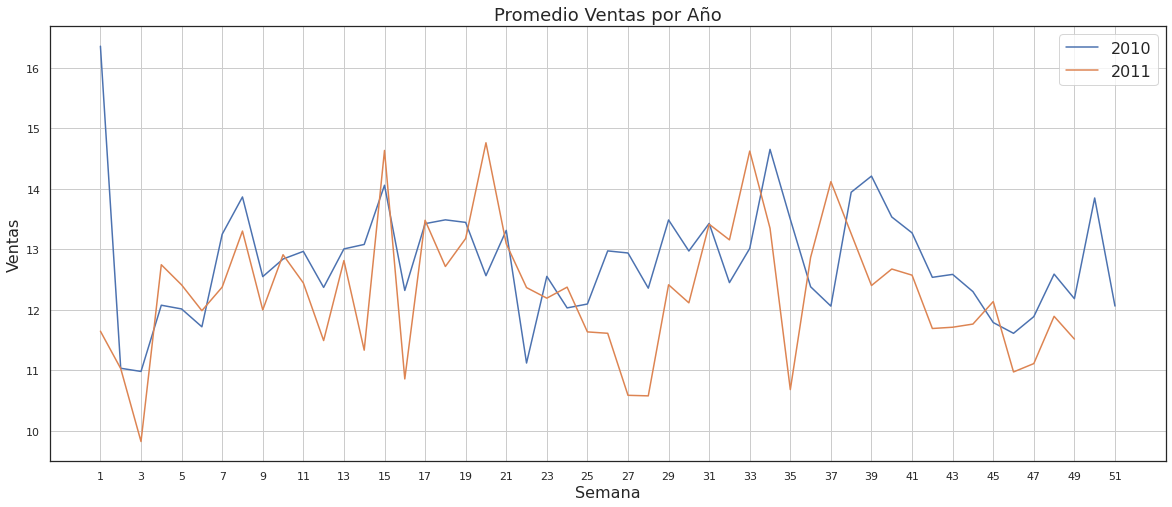

In [ ]:
datagrafico_UK_5 = data20.copy()

ventas_semanales2010 = datagrafico_UK_5[datagrafico_UK_5.Año==2010]['Total'].groupby(datagrafico_UK_5['Semana']).mean()
ventas_semanales2011 = datagrafico_UK_5[datagrafico_UK_5.Año==2011]['Total'].groupby(datagrafico_UK_5['Semana']).mean()
plt.figure(figsize = (20,8))
sns.lineplot(ventas_semanales2010.index, ventas_semanales2010.values)
sns.lineplot(ventas_semanales2011.index, ventas_semanales2011.values)
plt.grid()
plt.xticks(np.arange(1, 53, step=2))
plt.legend(['2010','2011'], loc = 'best', fontsize= 16)
plt.title('Promedio Ventas por Año', fontsize = 18)
plt.ylabel('Ventas', fontsize= 16)
plt.xlabel('Semana', fontsize= 16)
plt.savefig('Promedio_venta_xaño.png', dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
data20.Año.unique()

array([2010, 2011])

In [ ]:
data18.DiaSemana.unique()

array([1, 2, 3, 4, 5, 6, 0])

In [ ]:
Viernes_2009= data18[data18.Año==2011]

## Machine Learning ##

In [ ]:
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
data20.head()

,Factura,CodigoProd,Descripcion,Pais,Fecha,Date,Año,Q,Mes,Semana,DiaSemana,Dia,DiaAño,Hora,Compra/Cancelacion,Precio,Cantidad,Total
42256,493413,21724,panda and bunnies sticker sheet,United Kingdom,2010-01-04,2010-01,2010,1,1,1,0,4,4,9,1,0.8500,1,0.8500
42257,493413,84578,elephant toy with blue t-shirt,United Kingdom,2010-01-04,2010-01,2010,1,1,1,0,4,4,9,1,3.7500,1,3.7500
42258,493413,21723,alphabet hearts sticker sheet,United Kingdom,2010-01-04,2010-01,2010,1,1,1,0,4,4,9,1,0.8500,1,0.8500
42259,493414,21533,retro spot large milk jug,United Kingdom,2010-01-04,2010-01,2010,1,1,1,0,4,4,10,1,4.2500,12,51.0000
42260,493414,37508,new england ceramic cake server,United Kingdom,2010-01-04,2010-01,2010,1,1,1,0,4,4,10,1,2.5500,2,5.1000


In [ ]:
ventas_top_producto_UK = data20.groupby(['Descripcion'], as_index=False).agg({'Total':'sum'})
ventas_top_producto_UK['porcentaje'] =(ventas_top_producto_UK['Total'] / ventas_top_producto_UK['Total'].sum())*100
ventas_top_producto_UK = ventas_top_producto_UK.sort_values(by='Total', ascending=False)
ventas_top_producto_UK['Acumulativo_Porcentaje'] =(ventas_top_producto_UK['porcentaje'].cumsum())
ventas_top_producto_UK = ventas_top_producto_UK[ventas_top_producto_UK['Acumulativo_Porcentaje']<=8]
ventas_top_producto_UK.Descripcion.unique()

array(['regency cakestand 3 tier', 'white hanging heart t-light holder',
       'party bunting', 'jumbo bag red retrospot', 'doormat union flag',
       'assorted colour bird ornament', 'home building block word',
       'chocolate hot water bottle', 'vintage union jack bunting',
       'red retrospot cake stand', 'doormat red retrospot',
       'chilli lights', 'wooden frame antique white ',
       'retrospot tea set ceramic 11 pc ',
       'wood s/3 cabinet ant white finish'], dtype=object)

In [ ]:
ventas_top_UK = data20.copy()
list2 = ['regency cakestand 3 tier', 'white hanging heart t-light holder','party bunting', 'jumbo bag red retrospot', 'doormat union flag','assorted colour bird ornament',
         'home building block word','chocolate hot water bottle', 'vintage union jack bunting','red retrospot cake stand', 'doormat red retrospot','chilli lights',
         'wooden frame antique white ','retrospot tea set ceramic 11 pc ','wood s/3 cabinet ant white finish']
columns = ['CodigoProd', 'Descripcion','Date', 'Precio', 'Cantidad', 'Total']
ventas_top_UK = ventas_top_UK[columns]
ventas_top_UK = ventas_top_UK[ventas_top_UK.Descripcion.isin(list2)].reset_index()
ventas_top_UK

,index,CodigoProd,Descripcion,Date,Precio,Cantidad,Total
0,42305,21843,red retrospot cake stand,2010-01,10.9500,1,10.9500
1,42307,79321,chilli lights,2010-01,4.9500,2,9.9000
2,42367,85099B,jumbo bag red retrospot,2010-01,1.9500,20,39.0000
3,42368,21843,red retrospot cake stand,2010-01,10.9500,2,21.9000
4,42376,21843,red retrospot cake stand,2010-01,9.9500,24,238.8000
...,...,...,...,...,...,...,...
29695,971886,22112,chocolate hot water bottle,2011-12,4.9500,6,29.7000
29696,971902,85123A,white hanging heart t-light holder,2011-12,2.9500,1,2.9500
29697,972107,79321,chilli lights,2011-12,5.7500,2,11.5000
29698,972117,84879,assorted colour bird ornament,2011-12,1.6900,16,27.0400


In [ ]:
ventas_top_UK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29700 entries, 0 to 29699
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        29700 non-null  int64  
 1   CodigoProd   29700 non-null  object 
 2   Descripcion  29700 non-null  object 
 3   Date         29700 non-null  object 
 4   Precio       29700 non-null  float64
 5   Cantidad     29700 non-null  int64  
 6   Total        29700 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.6+ MB


In [ ]:
# ventas_top_producto_UK_1.Date

NameError: ignored

In [ ]:
# ventas_top_producto_UK_1 = ventas_top_UK.copy()
ventas_top_producto_UK_1 = ventas_top_UK[ventas_top_UK.Descripcion =='regency cakestand 3 tier']
ventas_top_producto_UK_1 = data20.groupby(['Date'], as_index=False).agg({'Total':'sum'})
ventas_top_producto_UK_1.head()

,Date,Total
0,2010-01,321941.2520
1,2010-02,313150.1760
2,2010-03,448344.0210
3,2010-04,376822.6610
4,2010-05,379086.9600


In [ ]:
ventas_top_producto_UK_1.Date = pd.to_datetime(ventas_top_producto_UK_1.Date)
ventas_top_producto_UK_1.index = pd.DatetimeIndex(ventas_top_producto_UK_1.Date)
ventas_top_producto_UK_1.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01',
               '2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

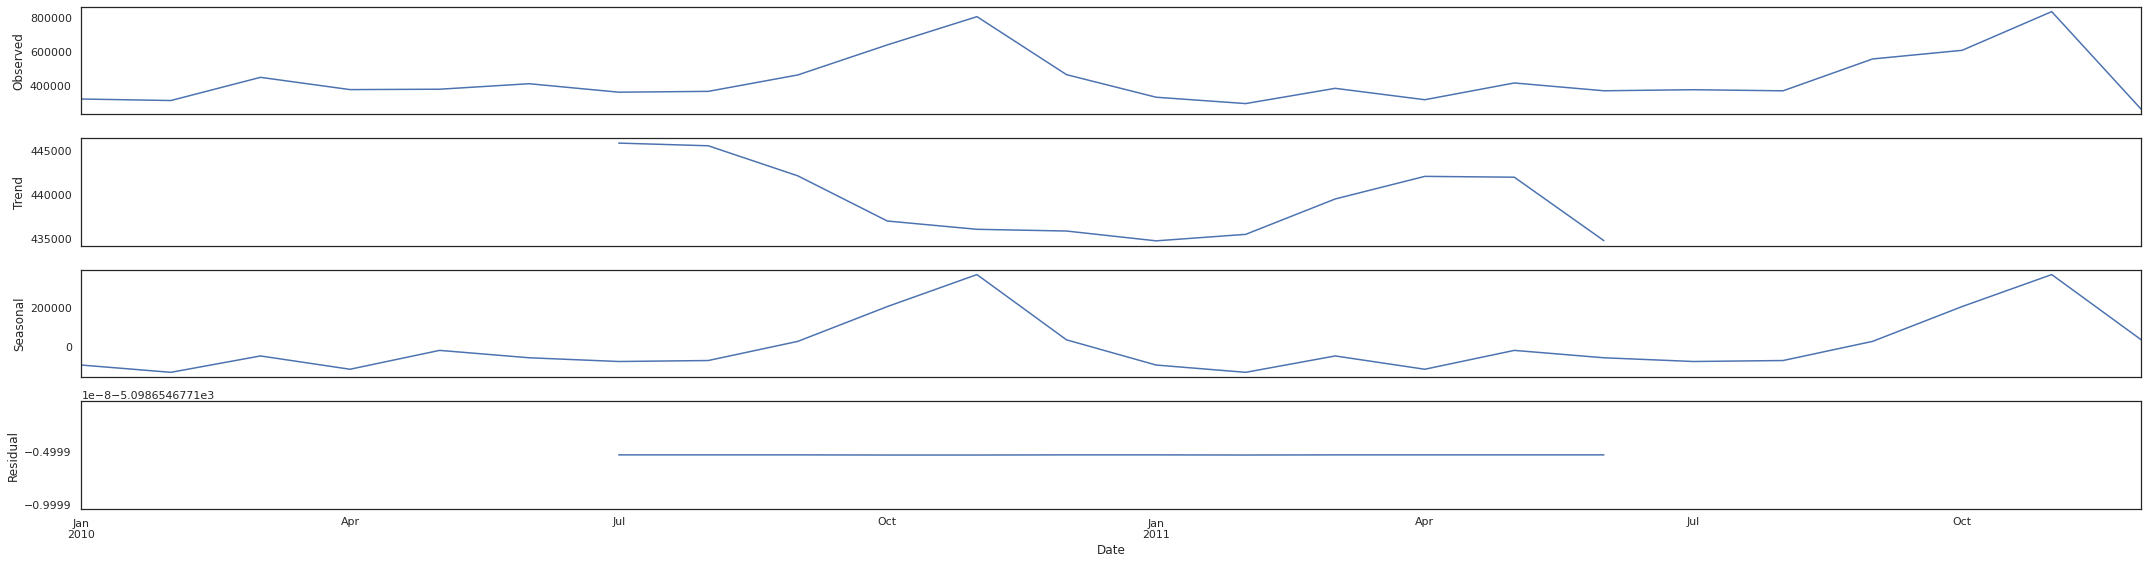

In [ ]:
res = sm.tsa.seasonal_decompose(ventas_top_producto_UK_1.Total)
resplot = res.plot()

In [ ]:
ventas_top_producto_UK_1.index.freq = 'MS'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

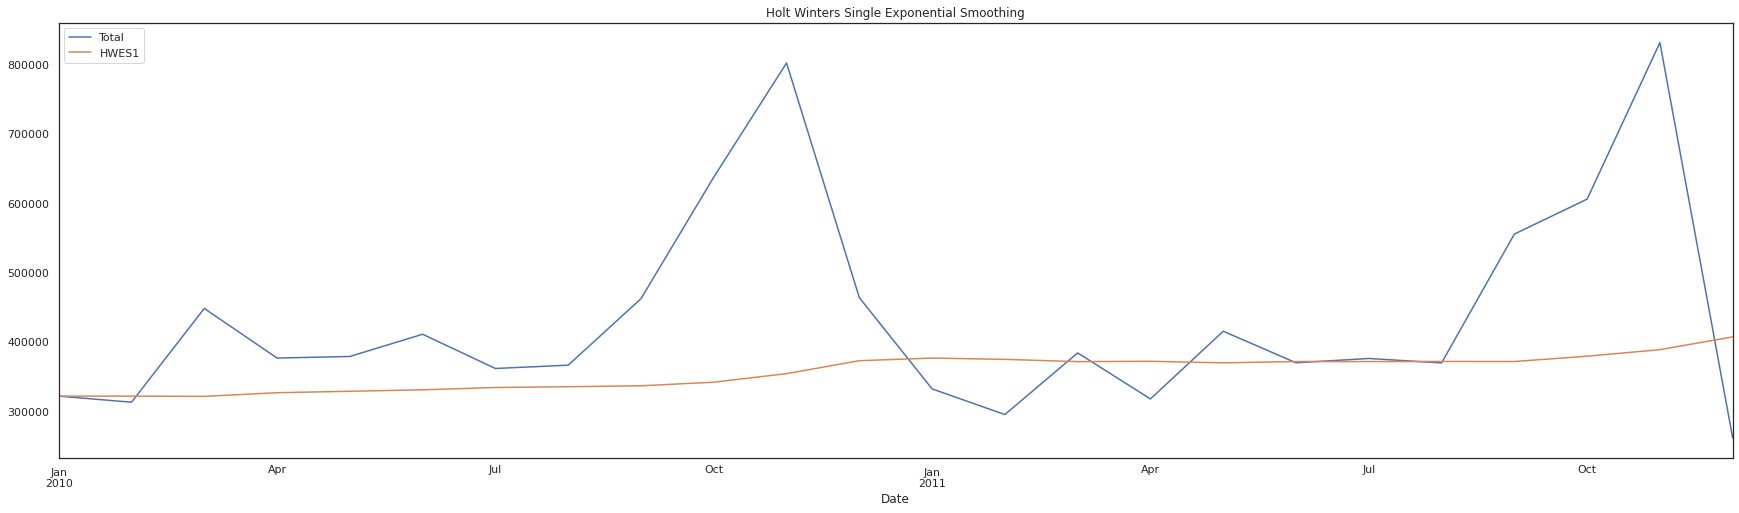

In [ ]:
ventas_top_producto_UK_1['HWES1'] = SimpleExpSmoothing(ventas_top_producto_UK_1['Total']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
ventas_top_producto_UK_1[['Total','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');

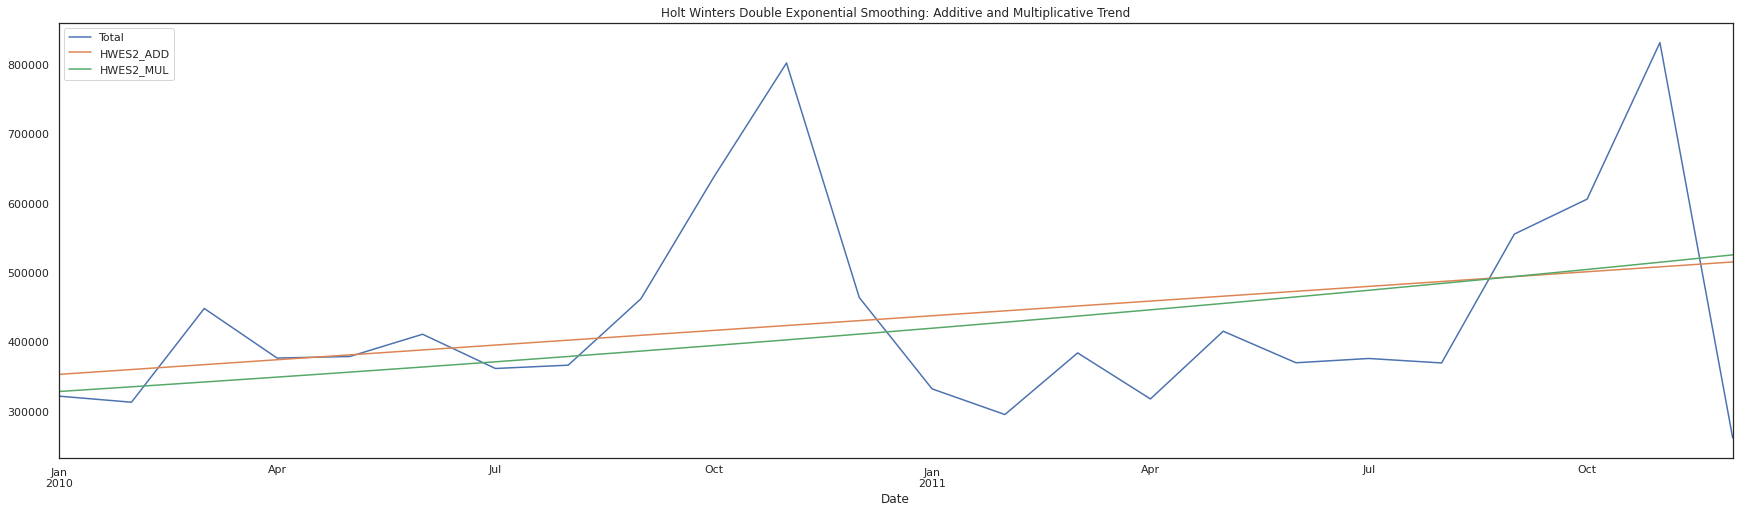

In [ ]:
ventas_top_producto_UK_1['HWES2_ADD'] = ExponentialSmoothing(ventas_top_producto_UK_1['Total'],trend='add').fit().fittedvalues
ventas_top_producto_UK_1['HWES2_MUL'] = ExponentialSmoothing(ventas_top_producto_UK_1['Total'],trend='mul').fit().fittedvalues
ventas_top_producto_UK_1[['Total','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


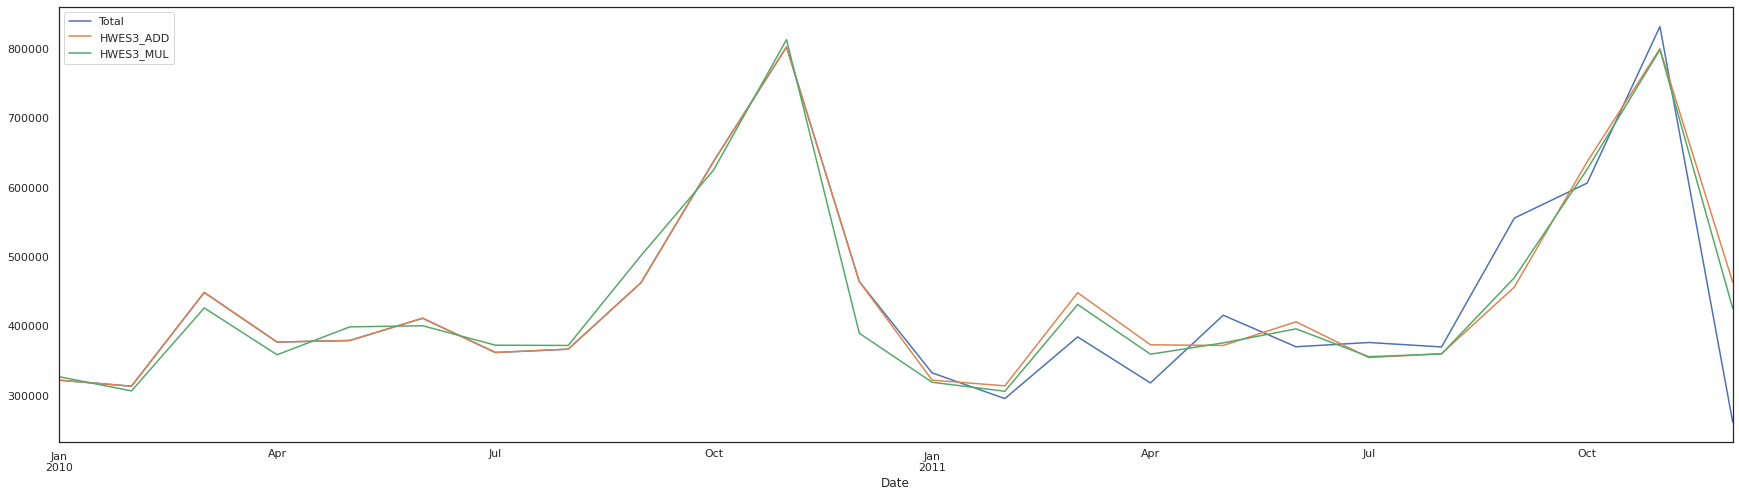

In [ ]:
ventas_top_producto_UK_1['HWES3_ADD'] = ExponentialSmoothing(ventas_top_producto_UK_1['Total'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
ventas_top_producto_UK_1['HWES3_MUL'] = ExponentialSmoothing(ventas_top_producto_UK_1['Total'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
ventas_top_producto_UK_1[['Total','HWES3_ADD','HWES3_MUL']].plot();#title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');
plt.savefig('Holt_Winters.png', dpi=300, bbox_inches='tight')

In [ ]:
ventas_top_producto_UK_15 = ventas_top_UK.copy()
ventas_top_producto_UK_15 = data20.groupby(['Date'], as_index=False).agg({'Total':'sum'})
ventas_top_producto_UK_15.head()

,Date,Total
0,2010-01,321941.2520
1,2010-02,313150.1760
2,2010-03,448344.0210
3,2010-04,376822.6610
4,2010-05,379086.9600


In [ ]:
train_set = ventas_top_producto_UK_15[:19]
test_set = ventas_top_producto_UK_15[19:]

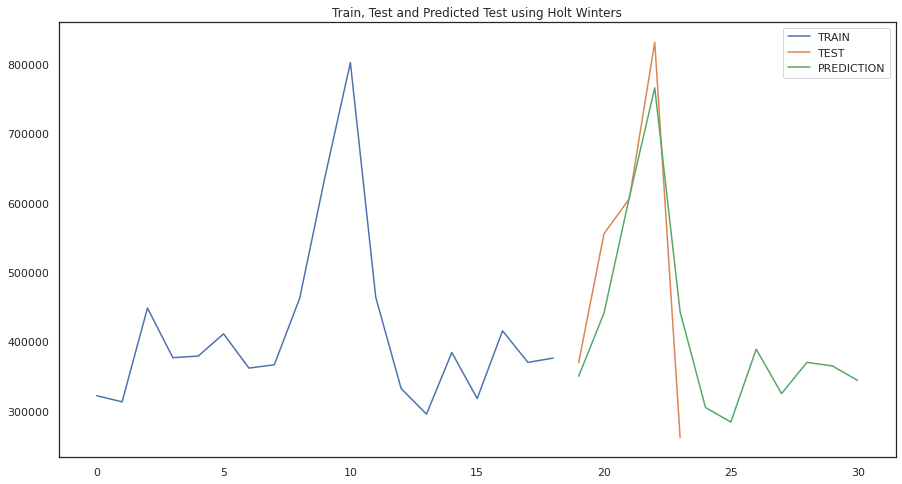

In [ ]:

fitted_model = ExponentialSmoothing(train_set['Total'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(12)
train_set['Total'].plot(legend=True,label='TRAIN')
test_set['Total'].plot(legend=True,label='TEST',figsize=(15,8))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')
plt.savefig('Train_Test_Predict.png', dpi=300, bbox_inches='tight')

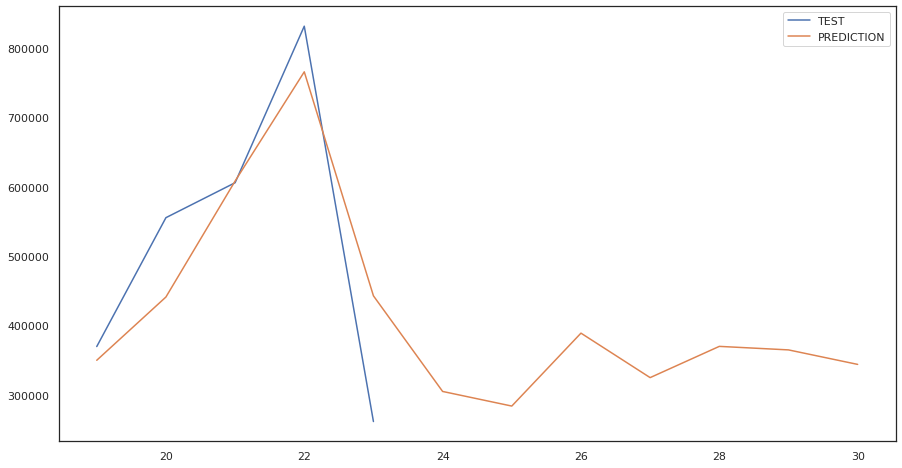

In [ ]:
test_set['Total'].plot(legend=True,label='TEST',figsize=(15,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [ ]:
test_predictions.shape

(12,)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [ ]:
test_predictions = pd.DataFrame(test_predictions)
test_predictions['Prediccion'] = test_predictions
test_predictions

,0,Prediccion
19,349963.7944,349963.7944
20,441165.8673,441165.8673
21,608291.1112,608291.1112
22,765798.9943,765798.9943
23,442872.8326,442872.8326
24,305040.9889,305040.9889
25,283961.8642,283961.8642
26,389092.4332,389092.4332
27,324978.1808,324978.1808
28,370015.0203,370015.0203


In [ ]:
test_set.keys()

Index(['Date', 'Total'], dtype='object')

In [ ]:
dataframenew = test_set.join(test_predictions)
dataframenew

,Date,Total,0,Prediccion
19,2011-08,369765.5200,349963.7944,349963.7944
20,2011-09,555537.9320,441165.8673,441165.8673
21,2011-10,605923.2800,608291.1112,608291.1112
22,2011-11,831596.9000,765798.9943,765798.9943
23,2011-12,261667.3700,442872.8326,442872.8326


In [ ]:
print(f'Mean Absolute Error = {mean_absolute_error(dataframenew.Total,dataframenew.Prediccion)}')
print(f'Mean Squared Error = {mean_squared_error(dataframenew.Total,dataframenew.Prediccion)}')

Mean Absolute Error = 76708.9979473475
Mean Squared Error = 10128693640.279194


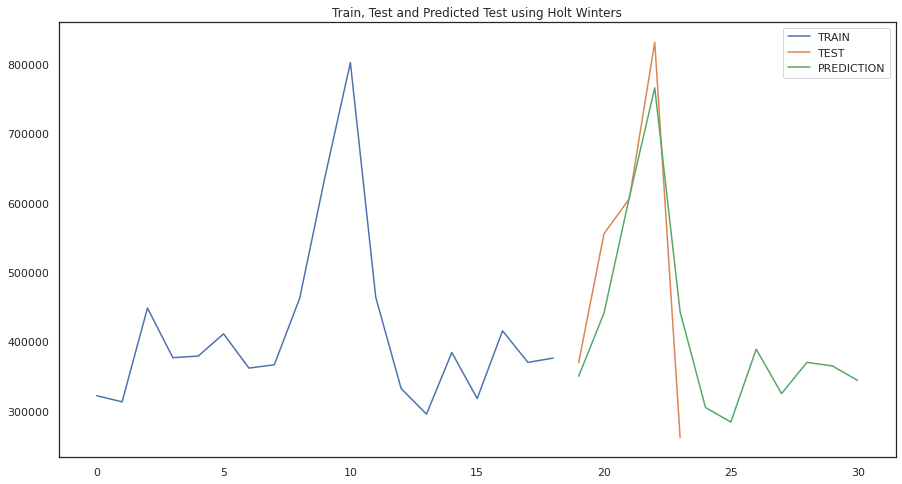

In [ ]:

fitted_model2 = ExponentialSmoothing(train_set['Total'],trend='add',seasonal='mult',seasonal_periods=12).fit()
test_predictions2 = fitted_model.forecast(12)
train_set['Total'].plot(legend=True,label='TRAIN')
test_set['Total'].plot(legend=True,label='TEST',figsize=(15,8))
test_predictions2.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')
plt.savefig('Train_Test_Predict2.png', dpi=300, bbox_inches='tight')

In [ ]:
test_predictions2 = pd.DataFrame(test_predictions2)
test_predictions2['Prediccion'] = test_predictions2
test_predictions2

,0,Prediccion
19,349963.7944,349963.7944
20,441165.8673,441165.8673
21,608291.1112,608291.1112
22,765798.9943,765798.9943
23,442872.8326,442872.8326
24,305040.9889,305040.9889
25,283961.8642,283961.8642
26,389092.4332,389092.4332
27,324978.1808,324978.1808
28,370015.0203,370015.0203


In [ ]:
dataframenew2 = test_set.join(test_predictions2)
dataframenew2

,Date,Total,0,Prediccion
19,2011-08,369765.5200,349963.7944,349963.7944
20,2011-09,555537.9320,441165.8673,441165.8673
21,2011-10,605923.2800,608291.1112,608291.1112
22,2011-11,831596.9000,765798.9943,765798.9943
23,2011-12,261667.3700,442872.8326,442872.8326


In [ ]:
print(f'Mean Absolute Error = {mean_absolute_error(dataframenew2.Total,dataframenew2.Prediccion)}')
print(f'Mean Squared Error = {mean_squared_error(dataframenew2.Total,dataframenew2.Prediccion)}')

Mean Absolute Error = 76708.9979473475
Mean Squared Error = 10128693640.279194


## Visualizaciones Generales ##

In [ ]:
data20.head()

,Factura,CodigoProd,Descripcion,Pais,Fecha,Date,Año,Q,Mes,Semana,DiaSemana,Dia,DiaAño,Hora,Compra/Cancelacion,Precio,Cantidad,Total
42256,493413,21724,panda and bunnies sticker sheet,United Kingdom,2010-01-04,2010-01,2010,1,1,1,0,4,4,9,1,0.8500,1,0.8500
42257,493413,84578,elephant toy with blue t-shirt,United Kingdom,2010-01-04,2010-01,2010,1,1,1,0,4,4,9,1,3.7500,1,3.7500
42258,493413,21723,alphabet hearts sticker sheet,United Kingdom,2010-01-04,2010-01,2010,1,1,1,0,4,4,9,1,0.8500,1,0.8500
42259,493414,21533,retro spot large milk jug,United Kingdom,2010-01-04,2010-01,2010,1,1,1,0,4,4,10,1,4.2500,12,51.0000
42260,493414,37508,new england ceramic cake server,United Kingdom,2010-01-04,2010-01,2010,1,1,1,0,4,4,10,1,2.5500,2,5.1000


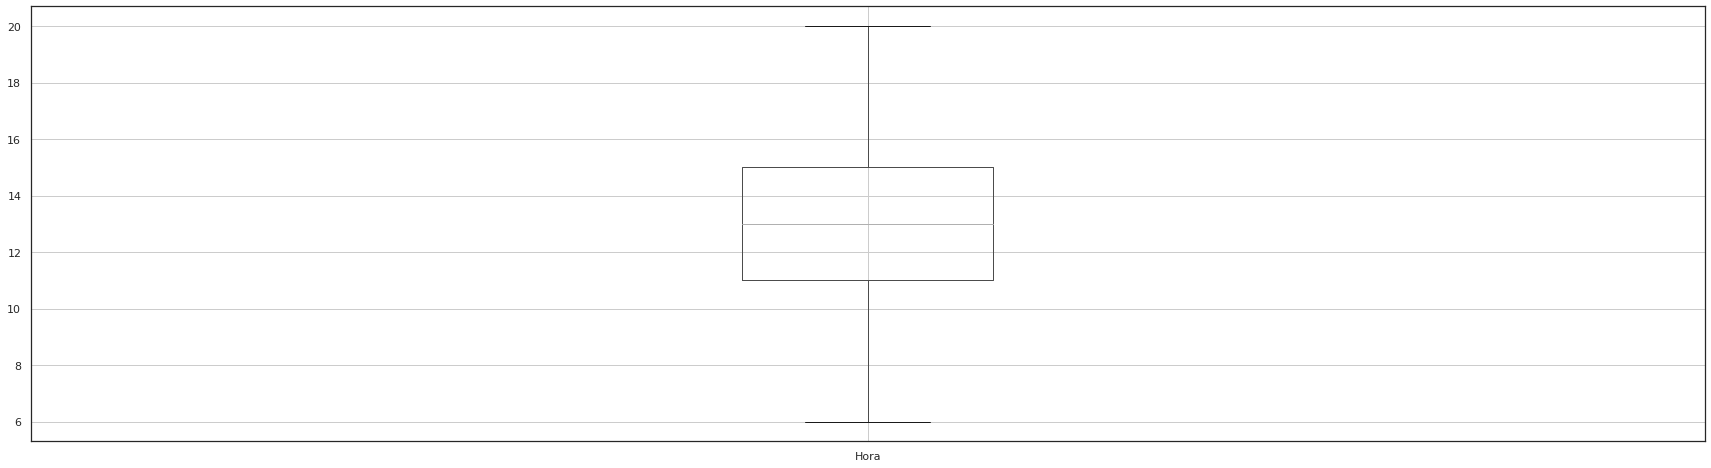

In [ ]:
data19.boxplot(column = 'Hora')

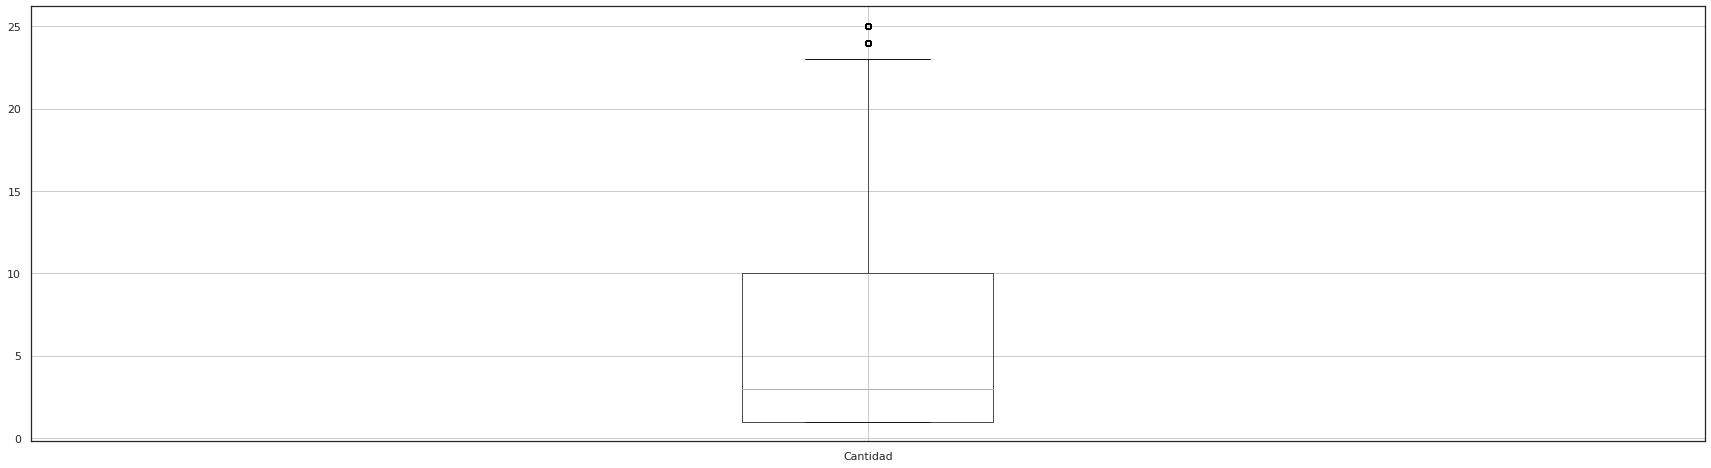

In [ ]:
data19.boxplot(column = 'Cantidad')

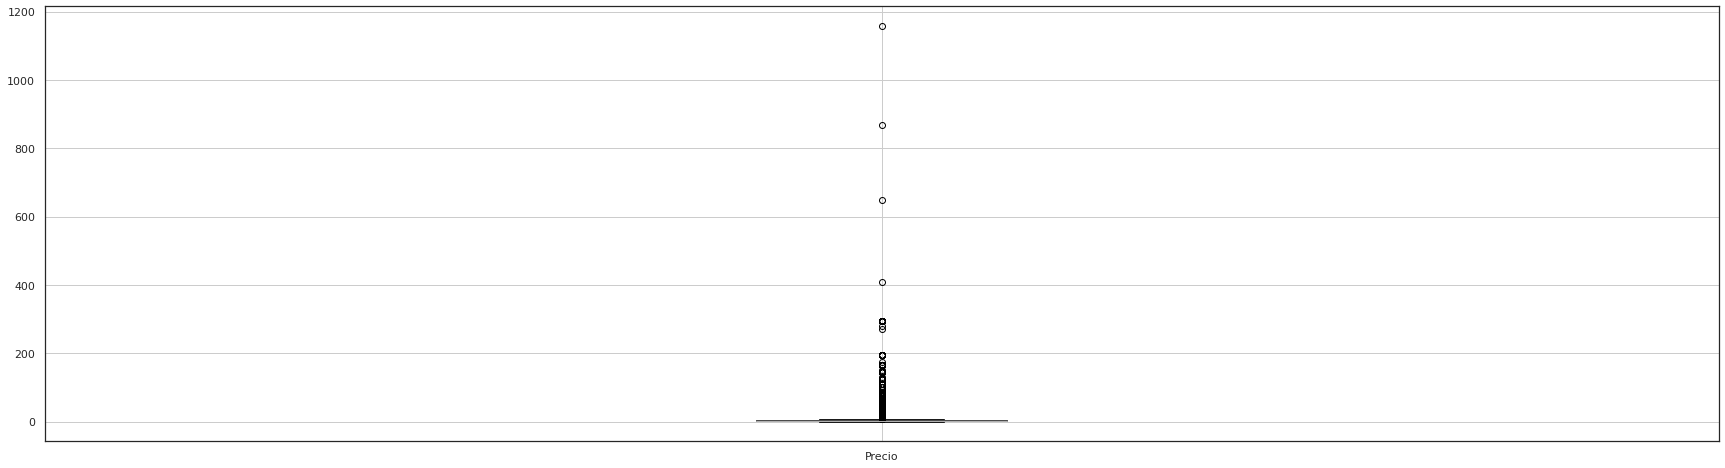

In [ ]:
data19.boxplot(column = 'Precio')

In [ ]:
mayor_correlacion_precio = data19.corr().Total.sort_values(ascending = False)
# mayor_correlacion_precio = mayor_correlacion_precio[mayor_correlacion_precio >0.5]
mayor_correlacion_precio

Total                 1.0000
Cantidad              0.4141
Precio                0.3931
Dia                   0.0001
Semana               -0.0049
Mes                  -0.0052
DiaAño               -0.0053
Q                    -0.0070
Año                  -0.0133
DiaSemana            -0.0225
Hora                 -0.1116
Compra/Cancelacion       nan
Name: Total, dtype: float64

In [ ]:
correlaciones = data20.corr().loc[mayor_correlacion_precio.index, mayor_correlacion_precio.index]
correlaciones

,Total,Cantidad,Precio,Dia,Semana,Mes,DiaAño,Q,Año,DiaSemana,Hora,Compra/Cancelacion
Total,1.0000,0.4218,0.3988,0.0007,-0.0039,-0.0042,-0.0043,-0.0062,-0.0162,-0.0236,-0.1059,nan
Cantidad,0.4218,1.0000,-0.2264,0.0047,-0.0033,-0.0037,-0.0034,-0.0032,0.0072,-0.0063,-0.1438,nan
Precio,0.3988,-0.2264,1.0000,-0.0003,-0.0174,-0.0177,-0.0179,-0.0203,-0.0226,-0.0342,0.0030,nan
Dia,0.0007,0.0047,-0.0003,1.0000,-0.0030,-0.0852,-0.0027,-0.0662,-0.0167,0.0113,-0.0067,nan
Semana,-0.0039,-0.0033,-0.0174,-0.0030,1.0000,0.9964,0.9998,0.9711,-0.0022,0.0114,0.0175,nan
Mes,-0.0042,-0.0037,-0.0177,-0.0852,0.9964,1.0000,0.9966,0.9731,-0.0061,0.0288,0.0175,nan
DiaAño,-0.0043,-0.0034,-0.0179,-0.0027,0.9998,0.9966,1.0000,0.9712,-0.0074,0.0298,0.0170,nan
Q,-0.0062,-0.0032,-0.0203,-0.0662,0.9711,0.9731,0.9712,1.0000,0.0013,0.0280,0.0171,nan
Año,-0.0162,0.0072,-0.0226,-0.0167,-0.0022,-0.0061,-0.0074,0.0013,1.0000,-0.0249,0.0372,nan
DiaSemana,-0.0236,-0.0063,-0.0342,0.0113,0.0114,0.0288,0.0298,0.0280,-0.0249,1.0000,-0.0195,nan


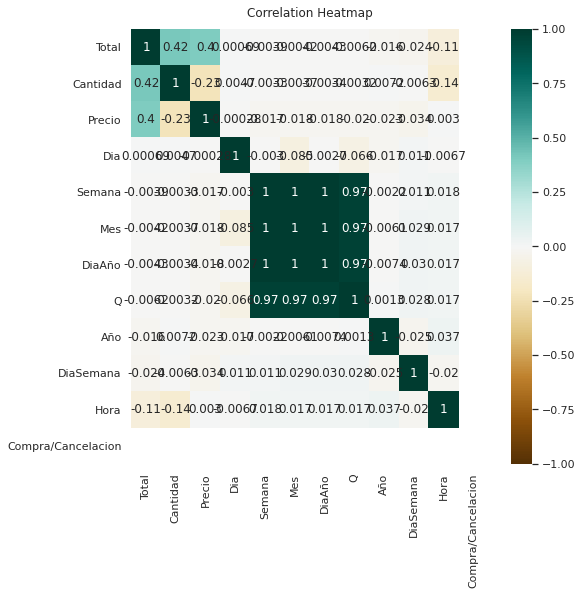

In [ ]:
plt.figure(figsize = (8,8))
heatmap = sns.heatmap(correlaciones, annot = True,  vmin=-1, vmax=1,  cmap='BrBG')
heatmap.set_title('Correlation Heatmap', pad=12);

Text(0.5, 1.0, 'Pais vs Promedio Cantidad Vendida')

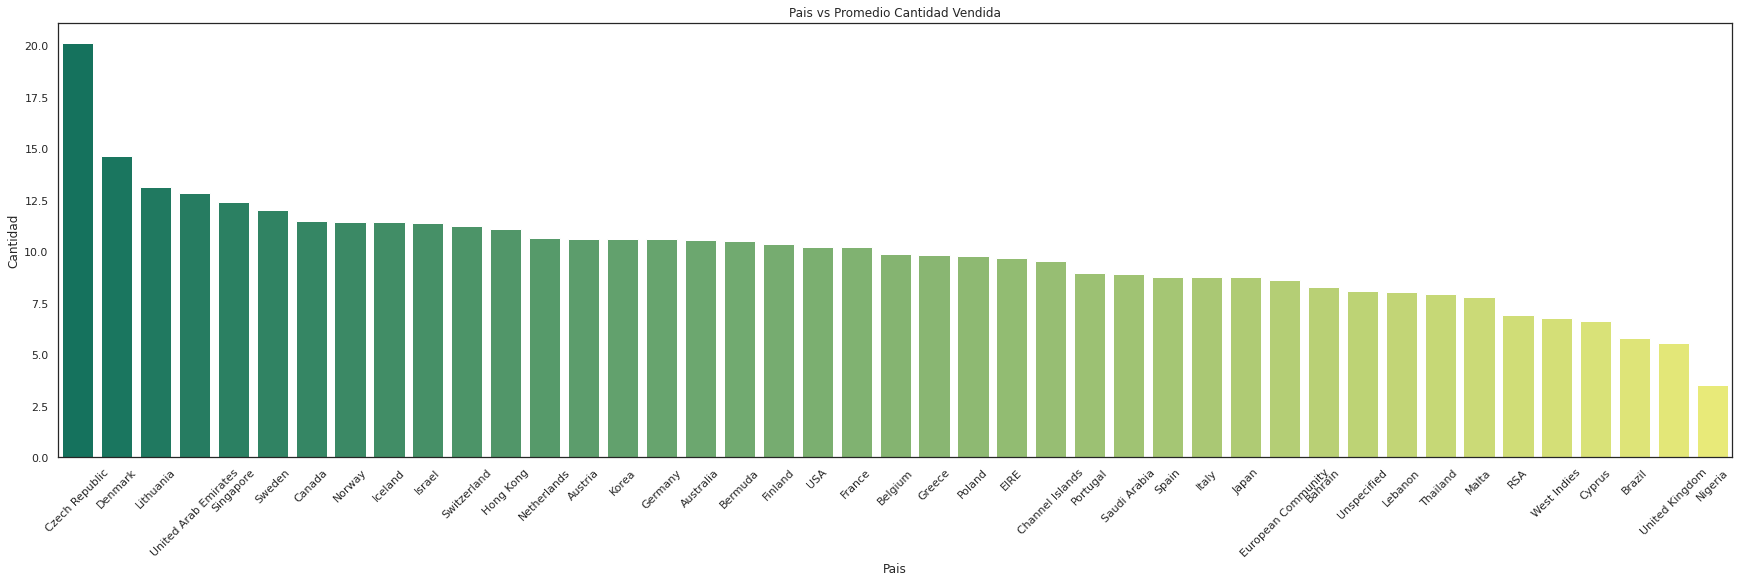

In [ ]:
datagrafico1 = data19.copy()
datagrafico1= datagrafico1[datagrafico1['Compra/Cancelacion']==1]
pais = datagrafico1.groupby('Pais').agg({'Cantidad':'mean'}).sort_values('Cantidad', ascending = False).reset_index()
sns.set(rc={'figure.figsize':(30,8)})
sns.set_style('white')
ax = sns.barplot(x='Pais', y= 'Cantidad', data=pais, palette= "summer")
plt.xticks(rotation=45)
plt.title('Pais vs Promedio Cantidad Vendida')

In [ ]:
data19.Año.unique()

array([2010, 2011])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


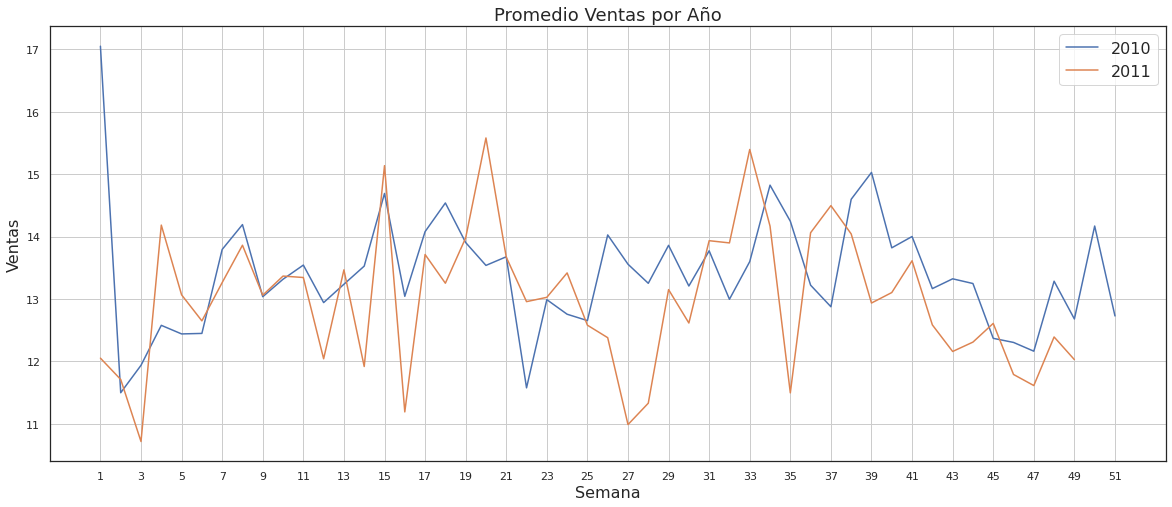

In [ ]:
from IPython.core.pylabtools import figsize
datagrafico2 = data19.copy()
datagrafico2= datagrafico2[datagrafico2['Compra/Cancelacion']==1]
# ventas_semanales2009 = datagrafico2[datagrafico2.Año==2009]['Total'].groupby(datagrafico2['Semana']).mean()
ventas_semanales2010 = datagrafico2[datagrafico2.Año==2010]['Total'].groupby(datagrafico2['Semana']).mean()
ventas_semanales2011 = datagrafico2[datagrafico2.Año==2011]['Total'].groupby(datagrafico2['Semana']).mean()
plt.figure(figsize = (20,8))
# sns.lineplot(ventas_semanales2009.index, ventas_semanales2009.values)
sns.lineplot(ventas_semanales2010.index, ventas_semanales2010.values)
sns.lineplot(ventas_semanales2011.index, ventas_semanales2011.values)
plt.grid()
plt.xticks(np.arange(1, 53, step=2))
plt.legend(['2010','2011'], loc = 'best', fontsize= 16)
plt.title('Promedio Ventas por Año', fontsize = 18)
plt.ylabel('Ventas', fontsize= 16)
plt.xlabel('Semana', fontsize= 16)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


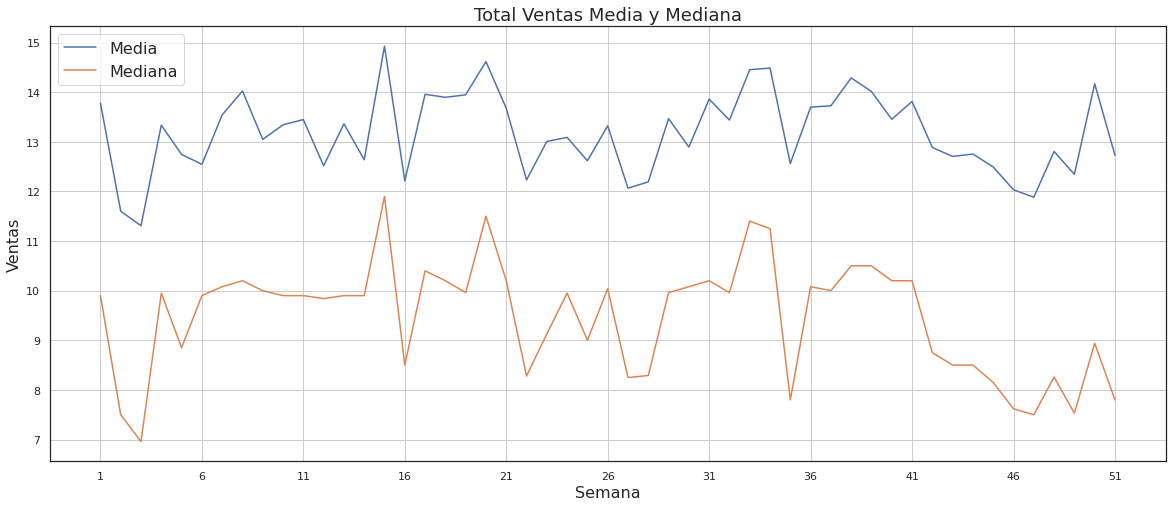

In [ ]:
datagrafico3 = data19.copy()
datagrafico3= datagrafico3[datagrafico3['Compra/Cancelacion']==1]
ventas_semanales_media = datagrafico3['Total'].groupby(datagrafico3['Semana']).mean()
ventas_semanales_mediana = datagrafico3['Total'].groupby(datagrafico3['Semana']).median()

plt.figure(figsize = (20,8))
plt.xticks(np.arange(1, 53, step=5))

sns.lineplot(ventas_semanales_media.index, ventas_semanales_media.values)
sns.lineplot(ventas_semanales_mediana.index, ventas_semanales_mediana.values)
plt.grid()
plt.legend(['Media','Mediana'], loc = 'best', fontsize= 16)
plt.title('Total Ventas Media y Mediana', fontsize = 18)
plt.ylabel('Ventas', fontsize= 16)
plt.xlabel('Semana', fontsize= 16)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


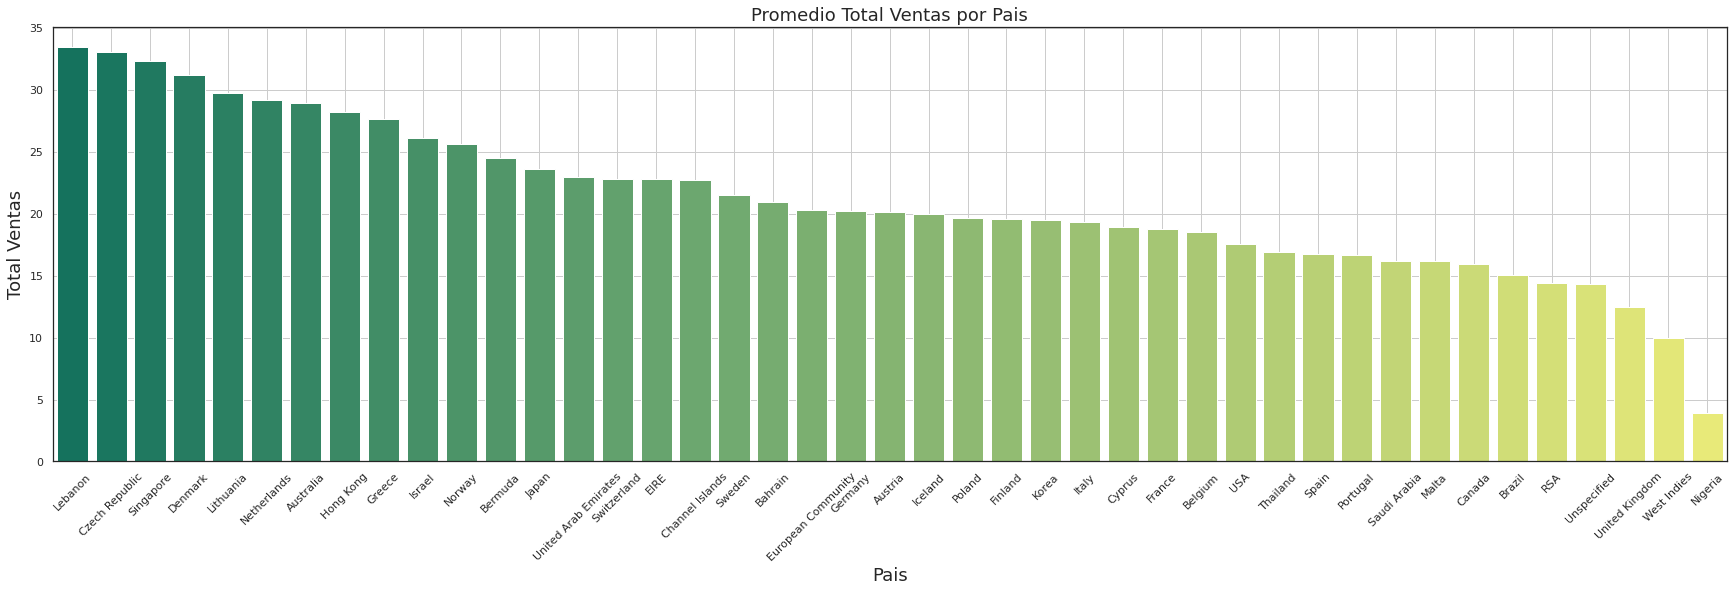

In [ ]:
datagrafico4 = data19.copy()
datagrafico4= datagrafico4[datagrafico4['Compra/Cancelacion']==1]
ventas_semanales = datagrafico4['Total'].groupby(datagrafico4.Pais).mean().sort_values(ascending=False)
plt.figure(figsize=(30,8))
sns.barplot(ventas_semanales.index, ventas_semanales.values, palette='summer')
plt.grid()
plt.xticks(rotation=45)
plt.title('Promedio Total Ventas por Pais', fontsize= 18)
plt.ylabel('Total Ventas', fontsize= 18)
plt.xlabel('Pais', fontsize = 18)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


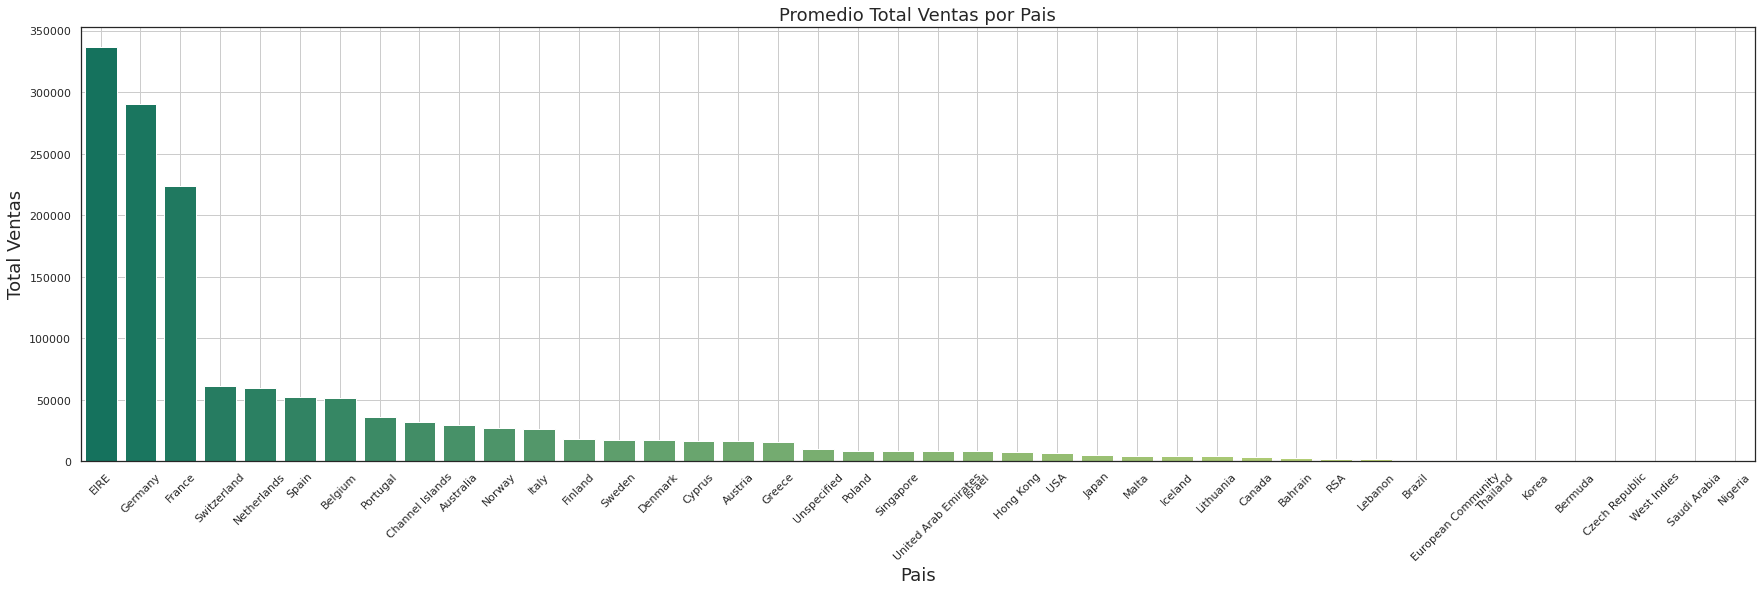

In [ ]:
datagrafico5 = data19.copy()
datagrafico5 = datagrafico5[datagrafico5['Compra/Cancelacion']==1]
datagrafico5 = datagrafico5[datagrafico5['Pais']!='United Kingdom']
ventas_semanales = datagrafico5['Total'].groupby(datagrafico5.Pais).sum().sort_values(ascending=False)
plt.figure(figsize=(30,8))
sns.barplot(ventas_semanales.index, ventas_semanales.values, palette='summer')
plt.grid()
plt.xticks(rotation=45)
plt.title('Promedio Total Ventas por Pais', fontsize= 18)
plt.ylabel('Total Ventas', fontsize= 18)
plt.xlabel('Pais', fontsize = 18)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


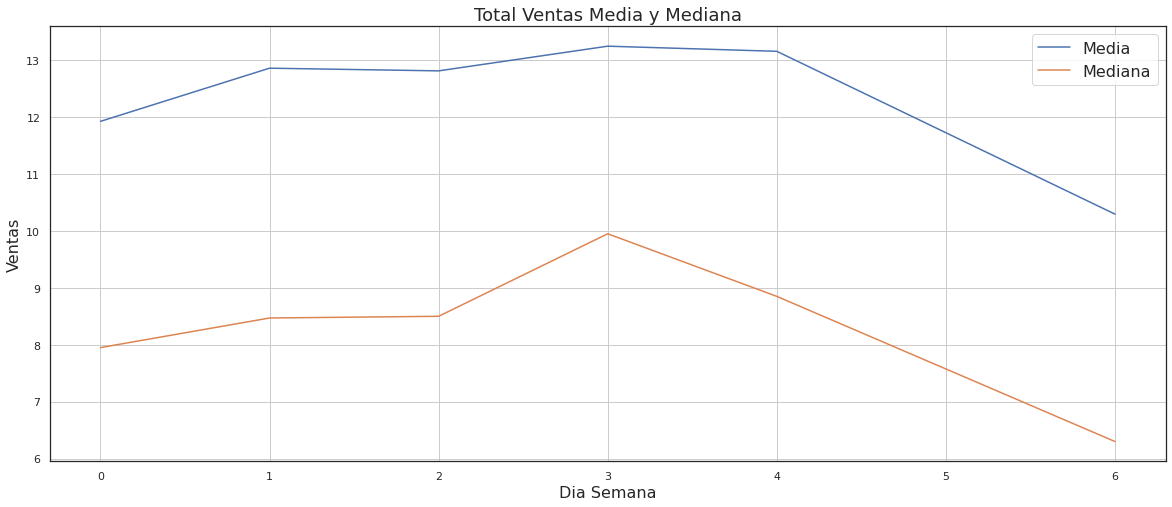

In [ ]:
datagrafico6 = data19.copy()
datagrafico6 = datagrafico6[datagrafico6['Compra/Cancelacion']==1]
datagrafico6 = datagrafico6[datagrafico6['Pais']=='United Kingdom']

ventas_dia_semana_media = datagrafico6['Total'].groupby(datagrafico6['DiaSemana']).mean()
ventas_dia_semana_mediana = datagrafico6['Total'].groupby(datagrafico6['DiaSemana']).median()

plt.figure(figsize = (20,8))
sns.lineplot(ventas_dia_semana_media.index, ventas_dia_semana_media.values)
sns.lineplot(ventas_dia_semana_mediana.index, ventas_dia_semana_mediana.values)
plt.grid()
plt.legend(['Media','Mediana'], loc = 'best', fontsize= 16)
plt.title('Total Ventas Media y Mediana', fontsize = 18)
plt.ylabel('Ventas', fontsize= 16)
plt.xlabel('Dia Semana', fontsize= 16)
plt.show()

In [ ]:
data19[data19.DiaSemana==5]

,Factura,CodigoProd,Descripcion,Pais,Fecha,Date,Año,Q,Mes,Semana,DiaSemana,Dia,DiaAño,Hora,Compra/Cancelacion,Precio,Cantidad,Total
